In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


Matplotlib is building the font cache; this may take a moment.


In [5]:
! pip install pandas
! pip install matplot
! pip install streamlit
! pip install tensorflow
! pip install numpy

In [6]:
! pip install numpy


In [7]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [8]:
img_width = 180
img_height =180 

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [10]:
data_cat = data_train.class_names

In [11]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [12]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [13]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


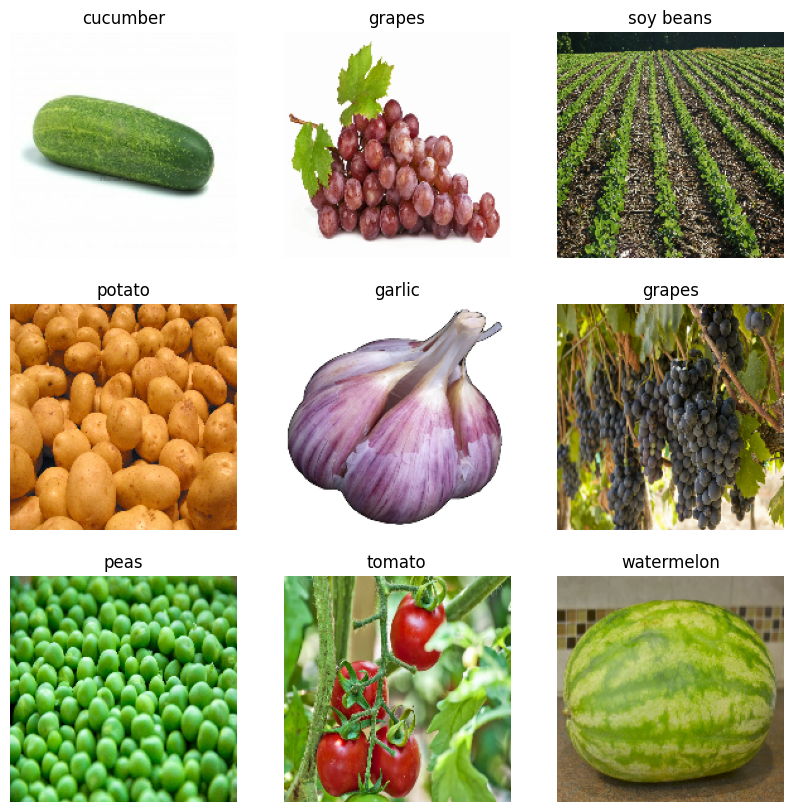

In [14]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 602ms/step - accuracy: 0.0676 - loss: 3.5981 - val_accuracy: 0.3419 - val_loss: 2.2930
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 519ms/step - accuracy: 0.2576 - loss: 2.5590 - val_accuracy: 0.6467 - val_loss: 1.3758
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 92s 894ms/step - accuracy: 0.4903 - loss: 1.7975 - val_accuracy: 0.8177 - val_loss: 0.7339
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 746ms/step - accuracy: 0.6842 - loss: 1.1030 - val_accuracy: 0.8803 - val_loss: 0.5301
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 469ms/step - accuracy: 0.8221 - loss: 0.6414 - val_accuracy: 0.9231 - val_loss: 0.3856
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 675ms/step - accuracy: 0.8986 - loss: 0.3584 - val_accuracy: 0.9345 - val_loss: 0.3933
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 840ms/step - accuracy: 0.9418 - loss: 0.2318 - val_accuracy: 0.9202 - val_loss: 0.5096
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 90s 874ms/step - accuracy: 0.9526 - loss: 0.1876 - val_accuracy: 0.957

Text(0.5, 1.0, 'Loss')

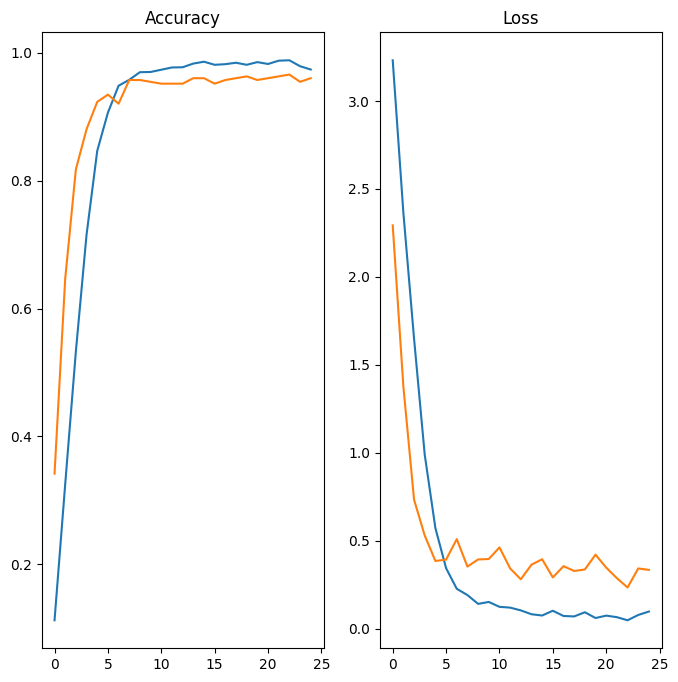

In [20]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [21]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [22]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


In [23]:
score = tf.nn.softmax(predict)

In [24]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 85.07


In [25]:
model.save('Image_classify.keras')